# [**Contraintes monotones**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_11_ensembles/plot_monotonic_constraints.ipynb)<br/>([_Monotonic Constraints_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_monotonic_constraints.html))

Cet exemple illustre l'effet des contraintes monotones sur un estimateur à amplification de gradient.

Nous construisons un ensemble de données factice où la valeur cible est généralement corrélée de manière positive avec la première caractéristique (avec certaines variations aléatoires et non aléatoires) et généralement corrélée de manière négative avec la deuxième caractéristique.

En imposant respectivement une contrainte de croissance monotone ou de décroissance monotone sur les caractéristiques pendant le processus d'apprentissage, l'estimateur est capable de suivre correctement la tendance générale au lieu d'être soumis aux variations.

Cet exemple s'inspire de la [**documentation XGBoost**](https://xgboost.readthedocs.io/en/latest/tutorials/monotonic.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay

rng = np.random.RandomState(0)

n_samples = 1000
f_0 = rng.rand(n_samples)
f_1 = rng.rand(n_samples)
X = np.c_[f_0, f_1]
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)

# y is positively correlated with f_0, and negatively correlated with f_1
y = 5 * f_0 + np.sin(10 * np.pi * f_0) - 5 * f_1 - np.cos(10 * np.pi * f_1) + noise

Entraînement d'un premier modèle sur cet ensemble de données sans aucune contrainte.

In [2]:
gbdt_no_cst = HistGradientBoostingRegressor()
gbdt_no_cst.fit(X, y)

HistGradientBoostingRegressor()

Entraînement d'un deuxième modèle sur cet ensemble de données avec des contraintes de croissance monotone (1) et de décroissance monotone (-1), respectivement.

In [3]:
gbdt_with_monotonic_cst = HistGradientBoostingRegressor(monotonic_cst=[1, -1])
gbdt_with_monotonic_cst.fit(X, y)

HistGradientBoostingRegressor(monotonic_cst=[1, -1])

Affichons la dépendance partielle des prédictions sur les deux caractéristiques.

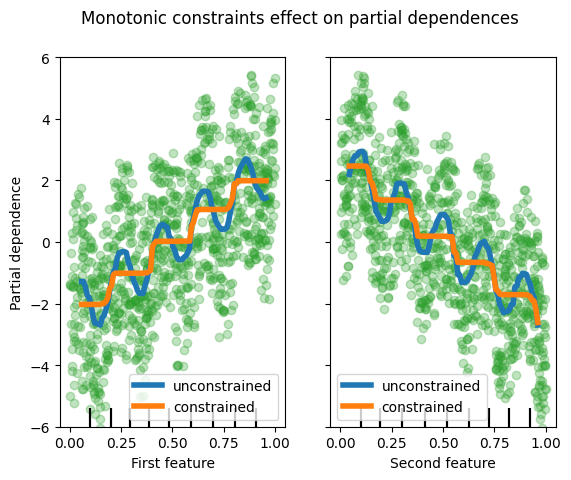

In [4]:
fig, ax = plt.subplots()
disp = PartialDependenceDisplay.from_estimator(
    gbdt_no_cst,
    X,
    features=[0, 1],
    feature_names=(
        "First feature",
        "Second feature",
    ),
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
    ax=ax,
)
PartialDependenceDisplay.from_estimator(
    gbdt_with_monotonic_cst,
    X,
    features=[0, 1],
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)

for f_idx in (0, 1):
    disp.axes_[0, f_idx].plot(
        X[:, f_idx], y, "o", alpha=0.3, zorder=-1, color="tab:green"
    )
    disp.axes_[0, f_idx].set_ylim(-6, 6)

plt.legend()
fig.suptitle("Monotonic constraints effect on partial dependences")
plt.show()

Nous pouvons voir que les prédictions du modèle non contraint capturent les oscillations des données tandis que le modèle contraint suit la tendance générale et ignore les variations locales.

# Utilisation des noms de caractéristiques pour spécifier les contraintes monotones

Notez que si les données d'entraînement comportent des noms de caractéristiques, il est possible de spécifier les contraintes monotones en passant un dictionnaire :

In [5]:
import pandas as pd

X_df = pd.DataFrame(X, columns=["f_0", "f_1"])

gbdt_with_monotonic_cst_df = HistGradientBoostingRegressor(
    monotonic_cst={"f_0": 1, "f_1": -1}
).fit(X_df, y)

np.allclose(
    gbdt_with_monotonic_cst_df.predict(X_df), gbdt_with_monotonic_cst.predict(X)
)

True